### **E-Commerce Sales Data 2023–2024 Overview**

  This dataset contains 2,000 sales records from 2023 to 2024, covering products, prices, discounts, and customer locations. It provides a clear view of how the business performed across different products, categories, and regions.

#### **Data Columns : contain 10 columns**

  1-Order ID – Unique code for each order.

  2-Order Date – Date the order was placed.

  3-Product – Name of the item sold.

  4-Category – Product type (Books, Clothes, Electronics, Food, Furniture).

  5-Quantity – Number of units sold.

  6-Unit Price – Price per unit before discount.

  7-Discount – Percentage reduction applied.

  8-Total Price – Final price after discount.

  9-Country – Destination country for the order.

  10-Region – Geographic area of the country.

### **What This Data Can Show**

  Best-selling products and categories.

  Which countries or regions generate the most sales.

  Seasonal patterns in sales.

  How discounts affect revenue.

#### 1 - import libraries

In [1]:
#import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import math
import warnings
warnings.filterwarnings('ignore')

#### 2 - Read Data

In [2]:
df=pd.read_excel('/content/Ecommerce_Sales_2023_2024.xlsx')
df

Order ID Order Date     Product  \
0     7c88300f-966d-44aa-b2bc-e8ad1df59404 2023-09-08  Headphones   
1     b46b01c0-9dd0-4806-944d-8a566fd580a6 2023-03-31  Headphones   
2     69155c25-c35f-4f81-9e09-f9f3c86f80cc 2023-08-27  Smartphone   
3     2f3d6d2f-52b1-4c1a-9227-87d0573e8ac4 2024-03-05      Laptop   
4     2a21ec36-501f-41e3-adb3-f2a6dd4d30d3 2023-06-13  Snacks Box   
...                                    ...        ...         ...   
1995  b96b2499-1013-4fe4-b29a-aff33347bce3 2023-12-12         Tea   
1996  ee496bbc-46af-4e1d-9c47-6e327ede6dde 2023-11-05      Tablet   
1997  bd4b5a54-8f16-4ac5-be8b-25e308774dae 2023-11-17      Jacket   
1998  5903464f-5a18-4ec9-aca8-869f7fa87557 2024-05-20  Smartphone   
1999  ec33b71e-d125-47ac-9957-5136e5a95307 2023-01-30      Jacket   

         Category  Quantity  Unit Price  Discount  Total Price       Country  \
0     Electronics         5       35.50      0.00       177.50       Germany   
1     Electronics         9      178.87      0.10      1448.85         India   
2     Electronics         4      229.80      0.15       781.32  Saudi Arabia   
3     Electronics         9     1341.87      0.10     10869.15       Germany   
4            Food         1       11.95      0.10        10.75         Japan   
...           ...       ...         ...       ...          ...           ...   
1995         Food         1       13.93      0.00        13.93         China   
1996  Electronics         7      502.42      0.05      3341.09        France   
1997      Clothes         9      124.07      0.15       949.14           UAE   
1998  Electronics         8      593.33      0.00      4746.64         China   
1999      Clothes         2      236.92      0.00       473.84       Germany   

           Region  
0          Europe  
1            Asia  
2     Middle East  
3          Europe  
4            Asia  
...           ...  
1995         Asia  
1996       Europe  
1997  Middle East  
1998         Asia  
1999       Europe  

[2000 rows x 10 columns]

#### 3 - Data Understanding

In [3]:
df.head()

Order ID Order Date     Product     Category  \
0  7c88300f-966d-44aa-b2bc-e8ad1df59404 2023-09-08  Headphones  Electronics   
1  b46b01c0-9dd0-4806-944d-8a566fd580a6 2023-03-31  Headphones  Electronics   
2  69155c25-c35f-4f81-9e09-f9f3c86f80cc 2023-08-27  Smartphone  Electronics   
3  2f3d6d2f-52b1-4c1a-9227-87d0573e8ac4 2024-03-05      Laptop  Electronics   
4  2a21ec36-501f-41e3-adb3-f2a6dd4d30d3 2023-06-13  Snacks Box         Food   

   Quantity  Unit Price  Discount  Total Price       Country       Region  
0         5       35.50      0.00       177.50       Germany       Europe  
1         9      178.87      0.10      1448.85         India         Asia  
2         4      229.80      0.15       781.32  Saudi Arabia  Middle East  
3         9     1341.87      0.10     10869.15       Germany       Europe  
4         1       11.95      0.10        10.75         Japan         Asia

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Order ID     2000 non-null   object        
 1   Order Date   2000 non-null   datetime64[ns]
 2   Product      1985 non-null   object        
 3   Category     2000 non-null   object        
 4   Quantity     2000 non-null   int64         
 5   Unit Price   2000 non-null   float64       
 6   Discount     2000 non-null   float64       
 7   Total Price  2000 non-null   float64       
 8   Country      1985 non-null   object        
 9   Region       2000 non-null   object        
dtypes: datetime64[ns](1), float64(3), int64(1), object(5)
memory usage: 156.4+ KB


#### 4 - Show null values

In [5]:
df.isnull().sum()

Order ID        0
Order Date      0
Product        15
Category        0
Quantity        0
Unit Price      0
Discount        0
Total Price     0
Country        15
Region          0
dtype: int64

##### drop null values from Product and Country

In [6]:
df.dropna(subset=['Product', 'Country'], inplace=True)

#### Make sure that Null values are removed

In [7]:
df.isnull().sum()

Order ID       0
Order Date     0
Product        0
Category       0
Quantity       0
Unit Price     0
Discount       0
Total Price    0
Country        0
Region         0
dtype: int64

#### 5 - Check Duplicate

In [8]:
df.duplicated().sum()

np.int64(0)

#### 6 - Find unique value

In [9]:
df.nunique()

Order ID       1970
Order Date      692
Product          20
Category          5
Quantity         10
Unit Price     1848
Discount          4
Total Price    1939
Country          13
Region            5
dtype: int64

#### 7 - Describe our data

In [10]:
df.describe()

Order Date     Quantity   Unit Price     Discount  \
count                           1970  1970.000000  1970.000000  1970.000000   
mean   2023-12-29 18:06:12.791878144     5.497970   224.825553     0.062360   
min              2023-01-01 00:00:00     1.000000     2.030000     0.000000   
25%              2023-06-26 06:00:00     3.000000    15.037500     0.000000   
50%              2023-12-28 00:00:00     6.000000    75.535000     0.050000   
75%              2024-06-29 18:00:00     8.000000   319.447500     0.100000   
max              2024-12-31 00:00:00    10.000000  1984.110000     0.150000   
std                              NaN     2.806299   321.624956     0.058557   

        Total Price  
count   1970.000000  
mean    1154.174467  
min        2.010000  
25%       67.932500  
50%      319.000000  
75%     1434.507500  
max    18603.900000  
std     1927.573547

In [11]:
df.describe().T

count                           mean                  min  \
Order Date     1970  2023-12-29 18:06:12.791878144  2023-01-01 00:00:00   
Quantity     1970.0                        5.49797                  1.0   
Unit Price   1970.0                     224.825553                 2.03   
Discount     1970.0                        0.06236                  0.0   
Total Price  1970.0                    1154.174467                 2.01   

                             25%                  50%                  75%  \
Order Date   2023-06-26 06:00:00  2023-12-28 00:00:00  2024-06-29 18:00:00   
Quantity                     3.0                  6.0                  8.0   
Unit Price               15.0375               75.535             319.4475   
Discount                     0.0                 0.05                  0.1   
Total Price              67.9325                319.0            1434.5075   

                             max          std  
Order Date   2024-12-31 00:00:00          NaN  
Quantity                    10.0     2.806299  
Unit Price               1984.11   321.624956  
Discount                    0.15     0.058557  
Total Price              18603.9  1927.573547

In [12]:
df.describe(include='object')

Order ID     Product     Category Country  \
count                                   1970        1970         1970    1970   
unique                                  1970          20            5      13   
top     ec33b71e-d125-47ac-9957-5136e5a95307  Smartphone  Electronics     UAE   
freq                                       1         119          493     172   

        Region  
count     1970  
unique       5  
top     Europe  
freq       707

#### 8 - Handling outlier

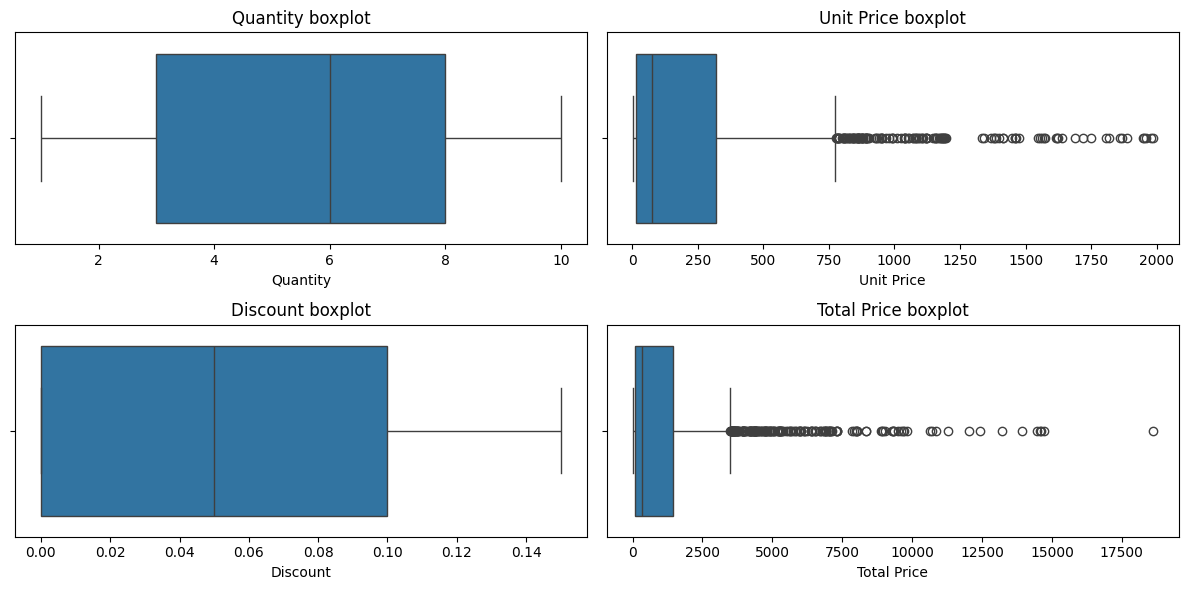

In [13]:
#show outlier
num_cols = df.select_dtypes("number").columns
n_cols = 2
n_rows = math.ceil(len(num_cols) / n_cols)
plt.figure(figsize=(12, n_rows * 3))
for i, col in enumerate(num_cols):
    plt.subplot(n_rows, n_cols, i+1)
    sns.boxplot(x=df[col], orient="h")
    plt.title(f"{col} boxplot")
plt.tight_layout()
plt.show()

In [14]:
#Remove outlier
for col in num_cols:
    Q1 = df[col].quantile(.25)
    Q3 = df[col].quantile(.75)
    IQR = Q3 - Q1
    Lower_Fence = Q1 - 1.5 * IQR
    Upper_Fence = Q3 + 1.5 * IQR
    Lower_Outliers = df[df[col] < Lower_Fence][col].values
    Upper_Outliers = df[df[col] > Upper_Fence][col].values
    df[col].replace(Lower_Outliers, Lower_Fence, inplace=True)
    df[col].replace(Upper_Outliers, Upper_Fence, inplace=True)

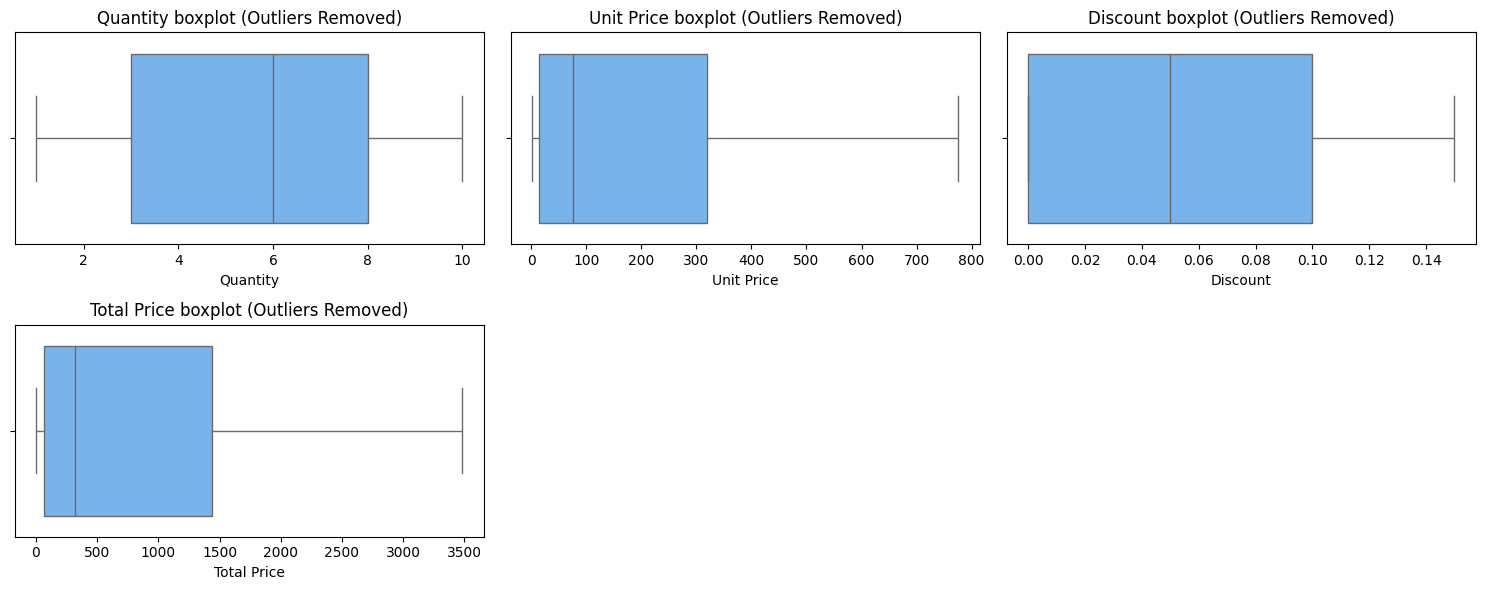

In [15]:
def remove_outliers(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return series[(series >= lower_bound) & (series <= upper_bound)]
num_cols = df.select_dtypes("number").columns
cols_per_row = 3
n_rows = math.ceil(len(num_cols) / cols_per_row)

plt.figure(figsize=(cols_per_row * 5, n_rows * 3))

for i, col in enumerate(num_cols):
    plt.subplot(n_rows, cols_per_row, i+1)
    cleaned_data = remove_outliers(df[col].dropna())  # Remove NaN and outliers
    sns.boxplot(x=cleaned_data, orient="h", color="#66b3ff")
    plt.title(f"{col} boxplot (Outliers Removed)")

plt.tight_layout()
plt.show()


#### 9 - Correlation

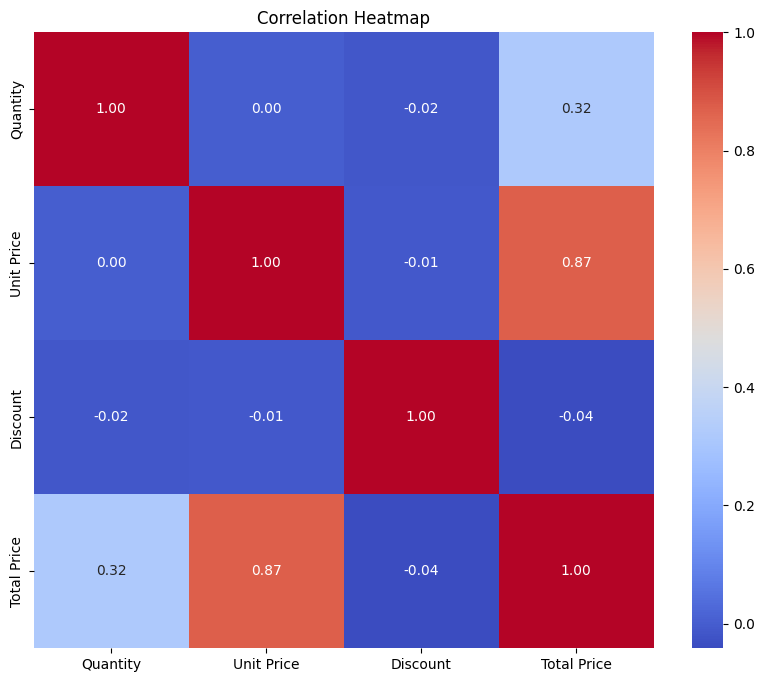

In [16]:
numeric_cols = df.select_dtypes("number").columns
corr_matrix = df[numeric_cols].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

####10 - Questions And Visualization

#### Q1 - What are the top-selling products by total revenue?


In [17]:
top_products = df.groupby('Product')['Total Price'].sum().sort_values(ascending=False).head(10)
top_products

Product
Smartphone      321123.95
Laptop          233434.11
Tablet          230242.08
Desk            187905.46
Wardrobe        162816.73
Bookshelf       143188.76
Smartwatch      134967.59
Office Chair    117198.85
Jacket           74937.87
Headphones       73525.10
Name: Total Price, dtype: float64

In [18]:
fig=px.bar(x=top_products.index,y=top_products.values,title='Top-selling products by total revenue')
fig.show()

**Answer is : Top Selling Product by Revenu is Smartphone and the Lowset is Headphones**

#### Q2 - What are the top-selling products by quantity sold?


In [19]:
top_products = df.groupby('Product')['Quantity'].sum().sort_values(ascending=False).head(10)
top_products

Product
Smartphone      666
Headphones      609
Snacks Box      596
Notebook        588
Textbook        587
Tablet          565
Jeans           563
Fiction Book    558
Office Chair    556
Bookshelf       547
Name: Quantity, dtype: int64

In [20]:
fig=px.bar(x=top_products.index,y=top_products.values,title='Top-selling products by quantity sold')
fig.show()

**Answer is : Top Selling Product by Quantity is Smartphone and the Lowset is Bookshelf**

#### Q3 - Which products have the highest average unit price?


In [21]:
average_price = df.groupby('Product')['Unit Price'].mean().sort_values(ascending=False).head(10)
average_price

Product
Laptop          745.431883
Smartphone      610.932626
Tablet          505.717628
Wardrobe        473.190396
Desk            453.193361
Bookshelf       285.464314
Smartwatch      274.735824
Office Chair    224.803100
Jacket          147.659700
Headphones      128.116154
Name: Unit Price, dtype: float64

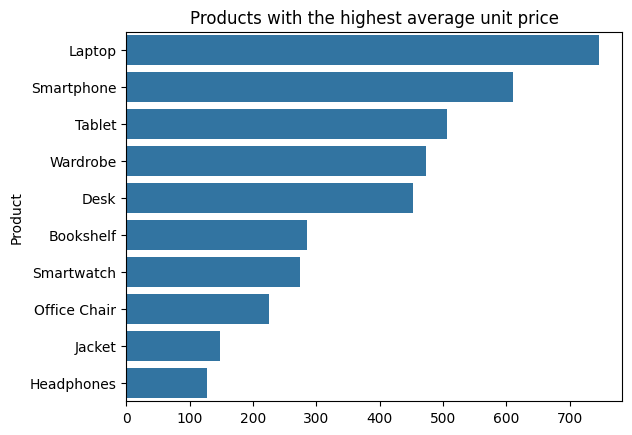

In [22]:
sns.barplot(x=average_price.values,y=average_price.index)
plt.title('Products with the highest average unit price')
plt.show()

**Answer is : Top Selling Product by Unit Price is Laptop and the Lowset is Headphones**

#### Q4 - Which products received the highest average discount?



In [23]:
average_discount = df.groupby('Product')['Discount'].mean().sort_values(ascending=False).head(10)
average_discount

Product
Chocolate       0.071287
Desk            0.068889
Smartwatch      0.065934
Bookshelf       0.065686
Snacks Box      0.065217
T-Shirt         0.065152
Office Chair    0.064500
Notebook        0.064356
Headphones      0.062981
Textbook        0.062617
Name: Discount, dtype: float64

In [24]:
fig=px.bar(x=average_discount.index,y=average_discount.values,title='Products with the highest average discount')
fig.show()

**The Highest Average Discount is Chocolate And The Lowest is Textbook**

#### Q5 - Which products are sold across the most countries?


In [25]:
product_countries = df.groupby('Product')['Country'].nunique().sort_values(ascending=False).head(10)
product_countries

Product
Bookshelf       13
Chocolate       13
Coffee          13
Desk            13
Fiction Book    13
Headphones      13
Jacket          13
Jeans           13
Laptop          13
Notebook        13
Name: Country, dtype: int64

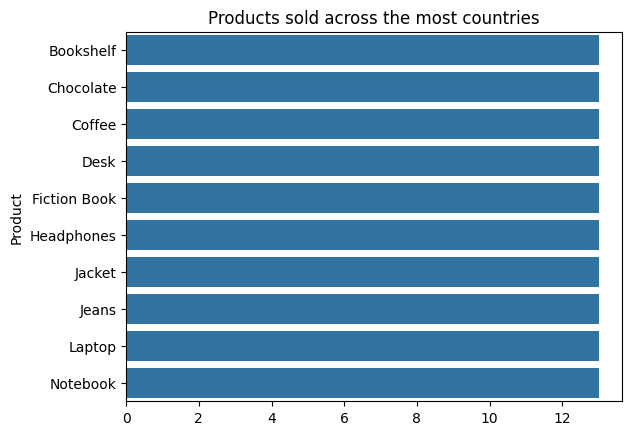

In [26]:
sns.barplot(x=product_countries.values,y=product_countries.index)
plt.title('Products sold across the most countries')
plt.show()

**All Product Have The same Sold Across All Countries**

#### Q6 - Which products show the biggest seasonal sales variation?


In [27]:
df["Month"] = df["Order Date"].dt.to_period("M").astype(str)
prod_monthly = df.groupby(["Product","Month"])["Total Price"].sum().unstack(fill_value=0)
seasonality = prod_monthly.std(axis=1).sort_values(ascending=False).head(10)
seasonality

Product
Smartphone      6464.818739
Wardrobe        5444.191064
Tablet          5335.523189
Laptop          5309.157518
Desk            3984.226490
Bookshelf       3830.085856
Smartwatch      3623.728377
Office Chair    2354.548473
Jacket          2097.946473
Headphones      1692.168128
dtype: float64

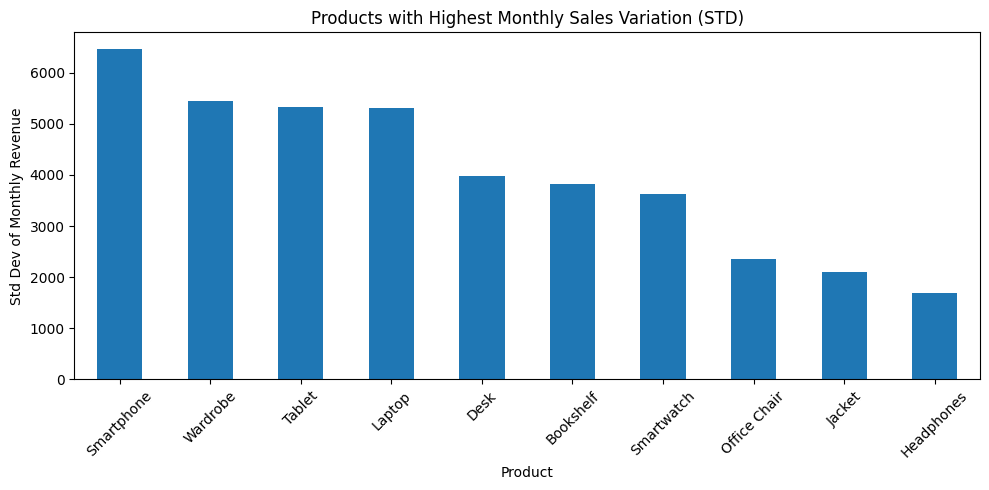

In [28]:
plt.figure(figsize=(10,5))
seasonality.plot(kind="bar")
plt.title("Products with Highest Monthly Sales Variation (STD)")
plt.ylabel("Std Dev of Monthly Revenue")
plt.xlabel("Product")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**The Product that show the biggest seasonal sales variation is Smartphone and Product that show the biggest seasonal sales variation is Headphones**

####Q7 - Which country generates the highest total revenue?


In [29]:
Country_Revenue = df.groupby('Country')['Total Price'].sum().sort_values(ascending=False).head(10)
Country_Revenue

Country
China        167820.85
Australia    164981.34
Canada       157443.68
UAE          156296.47
Germany      144404.00
France       141035.66
Italy        135780.23
India        134221.39
USA          133931.63
Spain        130490.09
Name: Total Price, dtype: float64

In [30]:
fig=px.bar(x=Country_Revenue.index,y=Country_Revenue.values,title='Country with the highest total revenue')
fig.show()

**The Country That generates the highest total revenue is China And  The Country That generates the Lowest total revenue is Spain**

#### Q8 - Which country sells the most units?


In [31]:
Country_Quantity = df.groupby('Country')['Quantity'].sum().sort_values(ascending=False).head(10)
Country_Quantity

Country
UAE             989
Australia       955
India           895
China           849
USA             844
Canada          843
Germany         831
Spain           809
UK              782
Saudi Arabia    777
Name: Quantity, dtype: int64

In [32]:
fig=px.bar(x=Country_Quantity.index,y=Country_Quantity.values,title='Country with the most units sold')
fig.show()

**The Country sells the most units is UAE And The country sells the least units is Saudi Arabia**

####Q9 - Which country offers the highest average discount?


In [33]:
Country_Discount = df.groupby('Country')['Discount'].mean().sort_values(ascending=False).head(10)
Country_Discount

Country
Australia    0.075000
China        0.065964
France       0.063448
Spain        0.063214
USA          0.062500
Canada       0.062102
Germany      0.061565
Japan        0.060638
UAE          0.060465
India        0.059006
Name: Discount, dtype: float64

In [34]:
fig=px.bar(x=Country_Discount.index,y=Country_Discount.values,title='Country with the highest average discount')
fig.show()

**The Country offers the highest average discount is Australia And The country offers the lowest average discount is India**

####Q10 -  Which country has the highest average unit price?


In [72]:
Country_Unit_Price = df.groupby('Country')['Unit Price'].mean().sort_values(ascending=False).head(10)
Country_Unit_Price

Country
China           230.483087
Australia       217.985366
Italy           216.472109
Canada          214.270318
France          213.771931
Germany         207.146020
USA             203.776530
UAE             187.980887
Saudi Arabia    185.697717
India           184.474845
Name: Unit Price, dtype: float64

In [36]:
fig=px.bar(x=Country_Unit_Price.index,y=Country_Unit_Price.values,title='Country with the highest average unit price')
fig.show()

**The Country has the highest average unit price is China And The Country has the lowest average unit price is India**

#### Q11 - Which region generates the most total revenue? or Which regions have the most balanced sales distribution?


In [37]:
Region_Revenue = df.groupby('Region')['Total Price'].sum().sort_values(ascending=False).head(10)
Region_Revenue

Region
Europe           673412.23
Asia             408734.53
North America    291375.31
Middle East      278414.51
Oceania          164981.34
Name: Total Price, dtype: float64

In [38]:
fig=px.pie(names=Region_Revenue.index,values=Region_Revenue.values,title='Region with the most total revenue')
fig.show()

**The Region with the most total revenue is Europe And The Region with the least total revenue is Oceania**

#### Q12 - Which countries have seasonal sales peaks?



In [39]:
df["Month"] = df["Order Date"].dt.to_period("M").astype(str)
country_monthly = df.groupby(["Country","Month"])["Total Price"].sum().unstack(fill_value=0)
seasonal_peaks = country_monthly.mean(axis=1).sort_values(ascending=False).head(10)
seasonal_peaks

Country
China        6992.535417
Australia    6874.222500
Canada       6560.153333
UAE          6512.352917
Germany      6016.833333
France       5876.485833
Italy        5657.509583
India        5592.557917
USA          5580.484583
Spain        5437.087083
dtype: float64

In [40]:
fig=px.bar(x=seasonal_peaks.index,y=seasonal_peaks.values,title='Countries with Seasonal Sales Peaks')
fig.show()

In [41]:
country_month = df.groupby(["Country","Month"])["Total Price"].sum().unstack(fill_value=0)
top_countries = df.groupby("Country")["Total Price"].sum().nlargest(10).index
peak_months = country_month.loc[top_countries].idxmax(axis=1).reset_index()
peak_months

Country        0
0      China  2024-08
1  Australia  2023-12
2     Canada  2024-10
3        UAE  2023-12
4    Germany  2023-03
5     France  2024-09
6      Italy  2023-06
7      India  2024-03
8        USA  2024-10
9      Spain  2023-01

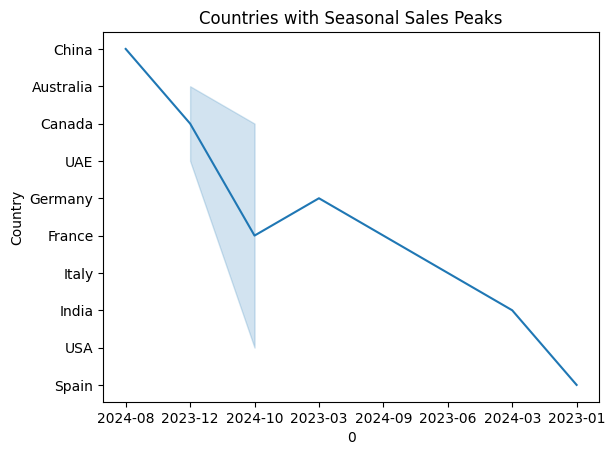

In [42]:
sns.lineplot(x=peak_months.iloc[:, 1], y=peak_months.iloc[:, 0])
plt.title('Countries with Seasonal Sales Peaks')
plt.show()

####lineplot

**Highest Country with Seasonal Sales Peaks is China and The Lowest Country is Spain**

#### Q13 - What are the monthly sales trends?



In [73]:
monthly_sales = df.groupby("Month")["Total Price"].sum().sort_values(ascending=False).head(10)
monthly_sales

Month
2024-10    93583.30
2024-12    89429.39
2023-03    89001.58
2023-09    85629.08
2024-04    84949.22
2024-09    83002.00
2023-01    82645.62
2023-12    81146.94
2024-03    79786.53
2024-08    79361.41
Name: Total Price, dtype: float64

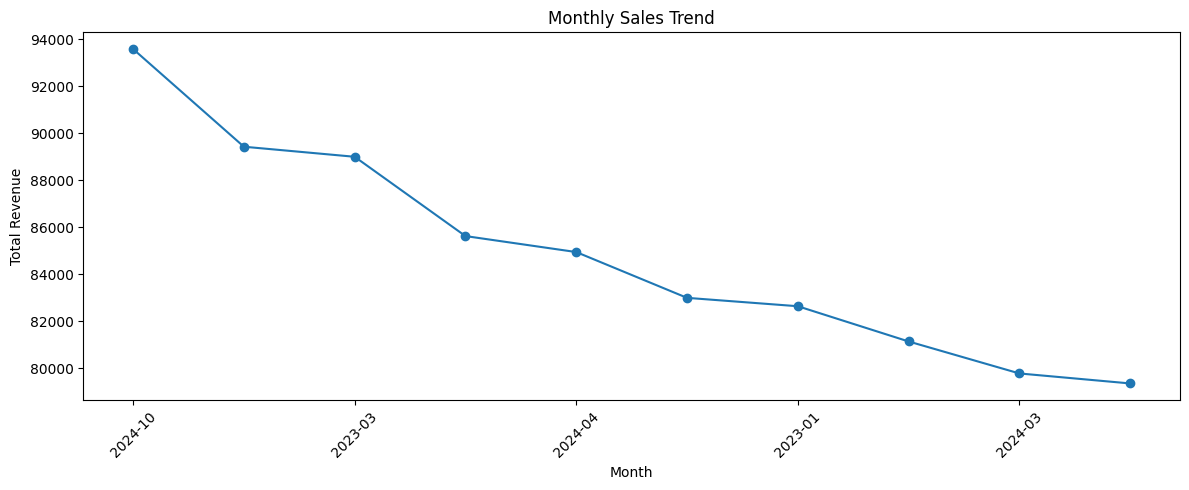

In [44]:
plt.figure(figsize=(12,5))
monthly_sales.plot(kind="line", marker="o")
plt.title("Monthly Sales Trend")
plt.ylabel("Total Revenue")
plt.xlabel("Month")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Highest Month Sales is 2024-10 And Lowest is 2024-08**

#### Q14 - Which quarter has the highest total revenue?



In [74]:
df["Quarter"] = df["Order Date"].dt.to_period("Q").astype(str)
quarter_revenue = df.groupby("Quarter")["Total Price"].sum().sort_values(ascending=False).head(10)
quarter_revenue

Quarter
2024Q4    259685.84
2024Q3    233811.76
2023Q1    231520.76
2023Q3    230590.02
2024Q1    224582.64
2023Q4    216101.63
2023Q2    212504.89
2024Q2    208120.38
Name: Total Price, dtype: float64

In [46]:
fig=px.line(x=quarter_revenue.index,y=quarter_revenue.values,title='Quarter with the highest total revenue')
fig.show()

**The quarter has the highest total revenue is Q4 in 2024 And The quarter has the Lowest total revenue is Q2 in 2024**

#### Q15 - How do sales differ between 2023 and 2024?


In [47]:
sales_2023 = df[df["Order Date"].dt.year == 2023]["Total Price"].sum()
sales_2024 = df[df["Order Date"].dt.year == 2024]["Total Price"].sum()
print("Sales in 2023:", sales_2023)
print("Sales in 2024:", sales_2024)

Sales in 2023: 890717.2999999999
Sales in 2024: 926200.62


In [48]:
fig=px.pie(names=['2023','2024'],values=[sales_2023,sales_2024],title='How do sales differ between 2023 and 2024')
fig.show()

**The Sales in 2024 in highest than the Sales in 2023 by 2%**

#### Q16 - Are there specific months with higher discounts?

In [49]:
df["Month"] = df["Order Date"].dt.to_period("M").astype(str)
monthly_discount = df.groupby("Month")["Discount"].mean().sort_values(ascending=False).head(10)
monthly_discount

Month
2024-03    0.071154
2024-04    0.071134
2024-01    0.069663
2024-07    0.067333
2023-03    0.066456
2023-02    0.066071
2024-10    0.064865
2023-06    0.064667
2024-06    0.063816
2023-10    0.063218
Name: Discount, dtype: float64

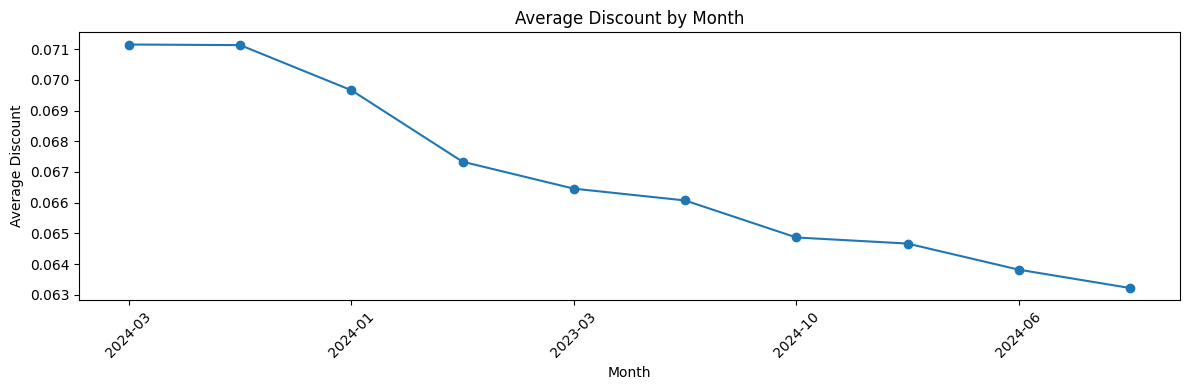

In [50]:
plt.figure(figsize=(12,4))
monthly_discount.plot(kind="line", marker="o")
plt.title("Average Discount by Month")
plt.ylabel("Average Discount")
plt.xlabel("Month")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**The Highest Discount is in 2024-03 and The Lowest in 2023-10**

#### Q17- What is the average order size per month?


In [75]:
monthly_order_size = df.groupby("Month")["Total Price"].mean().sort_values(ascending=False).head(10)
monthly_order_size

Month
2024-10    1264.639189
2024-08    1133.734429
2023-03    1126.602278
2023-09    1097.808718
2023-08    1052.742429
2024-02    1031.521486
2024-03    1022.904231
2023-12     989.596829
2023-06     964.248267
2024-07     952.644667
Name: Total Price, dtype: float64

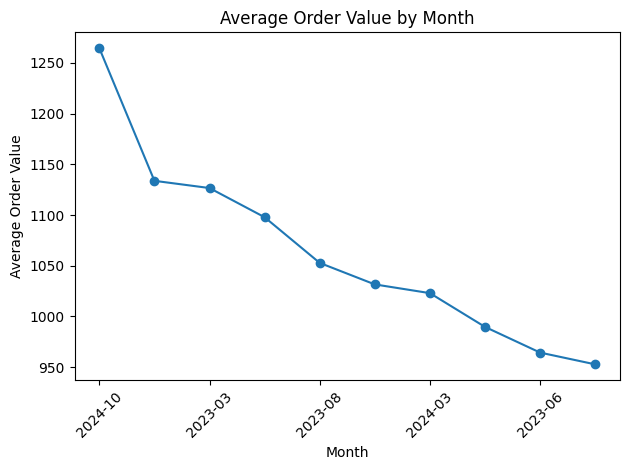

In [52]:
monthly_order_size.plot(kind="line", marker="o")
plt.title("Average Order Value by Month")
plt.ylabel("Average Order Value")
plt.xlabel("Month")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**The Highest Order Size is in 2024-10 and The Lowest in 2024-07**

#### Q18 - How many orders are placed each month?


In [53]:
monthly_orders = df.groupby("Month")["Order ID"].nunique().sort_values(ascending=False).head(10)
monthly_orders

Month
2024-12    103
2024-04     97
2023-05     94
2023-07     92
2024-01     89
2024-09     88
2023-01     87
2023-10     87
2023-02     84
2023-04     84
Name: Order ID, dtype: int64

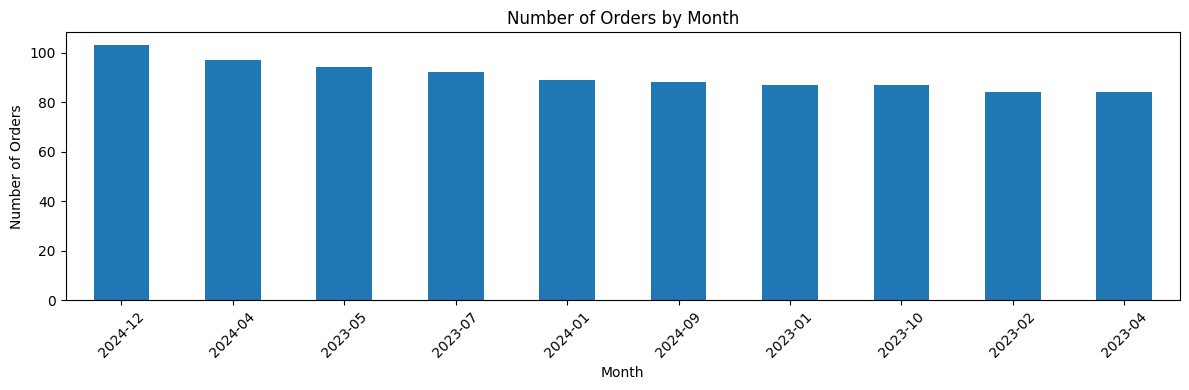

In [54]:
plt.figure(figsize=(12,4))
monthly_orders.plot(kind="bar")
plt.title("Number of Orders by Month")
plt.ylabel("Number of Orders")
plt.xlabel("Month")
plt.xticks(rotation=45)
plt.tight_layout()

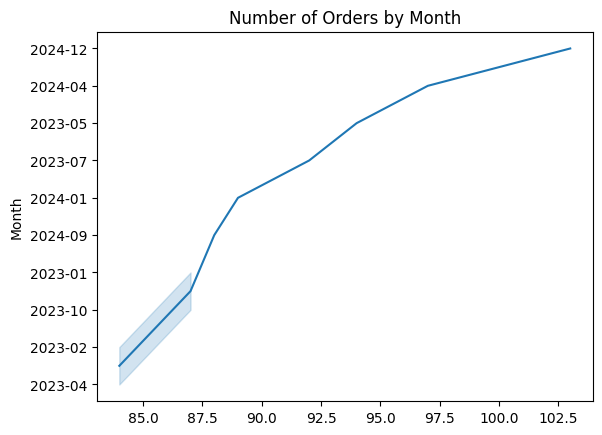

In [55]:
sns.lineplot(x=monthly_orders.values, y=monthly_orders.index)
plt.title('Number of Orders by Month')
plt.show()

**The Highest Number Of Orders is in 2024-12 And The Lowest Number Of Orders is in 2023-04**

#### Q19 - How do discounts affect total revenue?


In [56]:
discount_revenue = df.groupby("Discount")["Total Price"].sum().sort_values(ascending=False).head(10)
discount_revenue

Discount
0.00    719314.78
0.05    406629.48
0.15    365469.62
0.10    325504.04
Name: Total Price, dtype: float64

(array([0, 1, 2, 3]),
 [Text(0, 0, '0.0'),
  Text(1, 0, '0.05'),
  Text(2, 0, '0.15'),
  Text(3, 0, '0.1')])

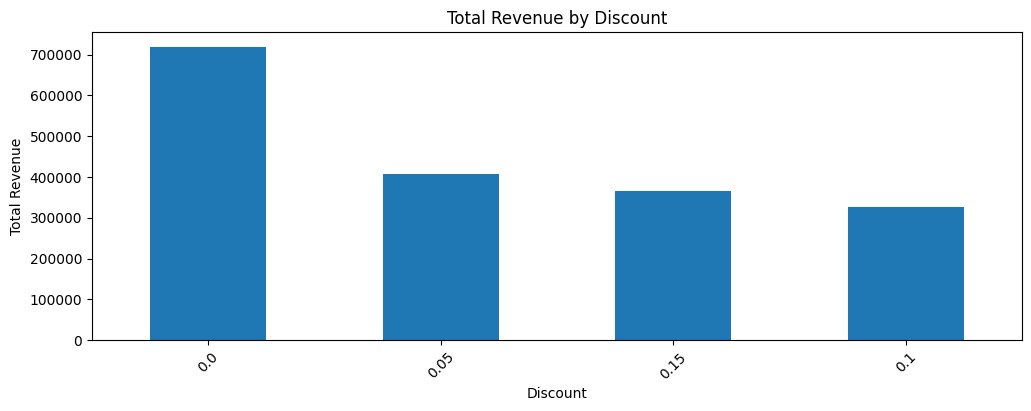

In [57]:
plt.figure(figsize=(12,4))
discount_revenue.plot(kind="bar")
plt.title("Total Revenue by Discount")
plt.ylabel("Total Revenue")
plt.xlabel("Discount")
plt.xticks(rotation=45)

**The Lowest Dicount The Highest Total Revenu**

#### Q20 - Which products respond best to discounts?


In [58]:
prod_disc_response = df.groupby("Product")["Discount"].sum().sort_values(ascending=False).head(10)
prod_disc_response

Product
Snacks Box      7.50
Smartphone      7.25
Chocolate       7.20
Bookshelf       6.70
Textbook        6.70
Headphones      6.55
Notebook        6.50
T-Shirt         6.45
Office Chair    6.45
Desk            6.20
Name: Discount, dtype: float64

In [59]:
fig=px.funnel(x=prod_disc_response.index,y=prod_disc_response.values,title='Products with the highest discount response')
fig.show()

**The Product That Respond best to discount is Snacks Box and Disk is the Lowest**

#### Numerical Data Distribution Graphs

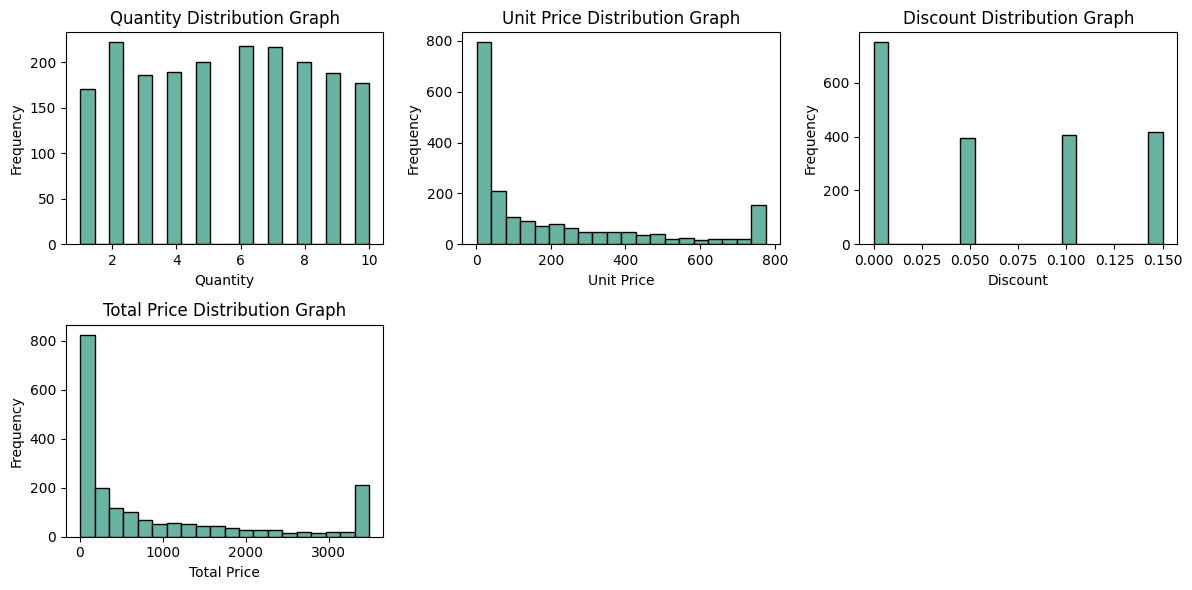

In [60]:
#hist
num_cols = df.select_dtypes("number").columns
n_cols = 3
n_rows = math.ceil(len(num_cols) / n_cols)
plt.figure(figsize=(n_cols * 4, n_rows * 3))
for i, col in enumerate(num_cols):
    plt.subplot(n_rows, n_cols, i+1)
    plt.hist(df[col], bins=20, edgecolor="black", color="#69b3a2")
    plt.title(f"{col} Distribution Graph")
    plt.xlabel(col)
    plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

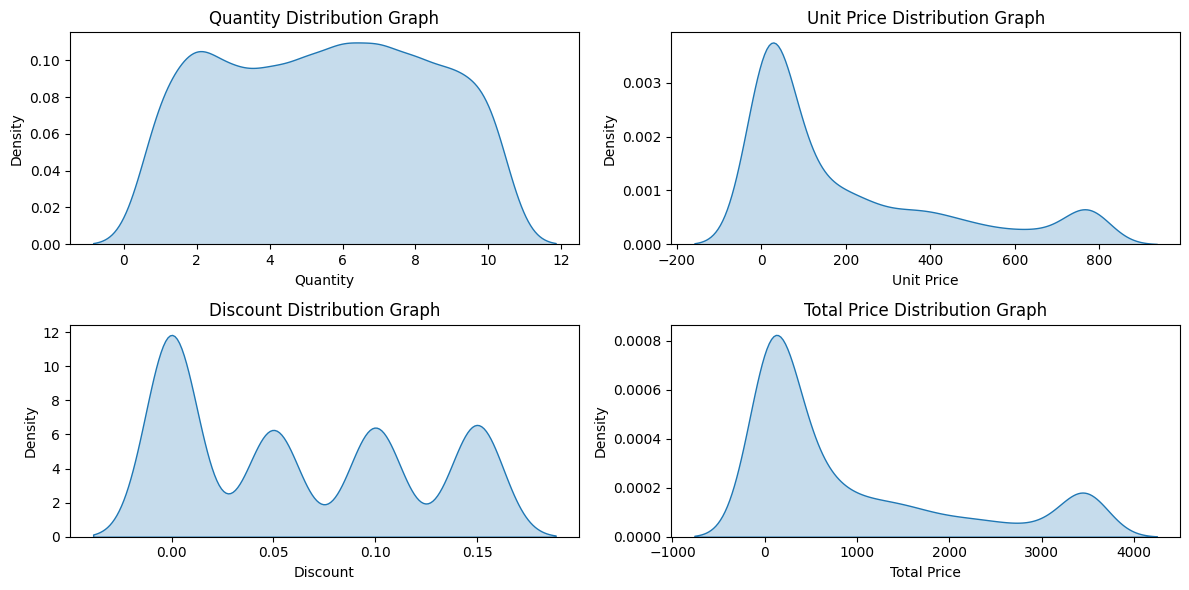

In [61]:
#Kdeplot
num_cols = df.select_dtypes("number").columns
n_cols = 2
n_rows = math.ceil(len(num_cols) / n_cols)
plt.figure(figsize=(12, n_rows * 3))
for i, col in enumerate(num_cols):
    plt.subplot(n_rows, n_cols, i+1)
    sns.kdeplot(df[col], fill=True)
    plt.title(f"{col} Distribution Graph")
plt.tight_layout()
plt.show()

#### Categorical Data Distribution Graphs

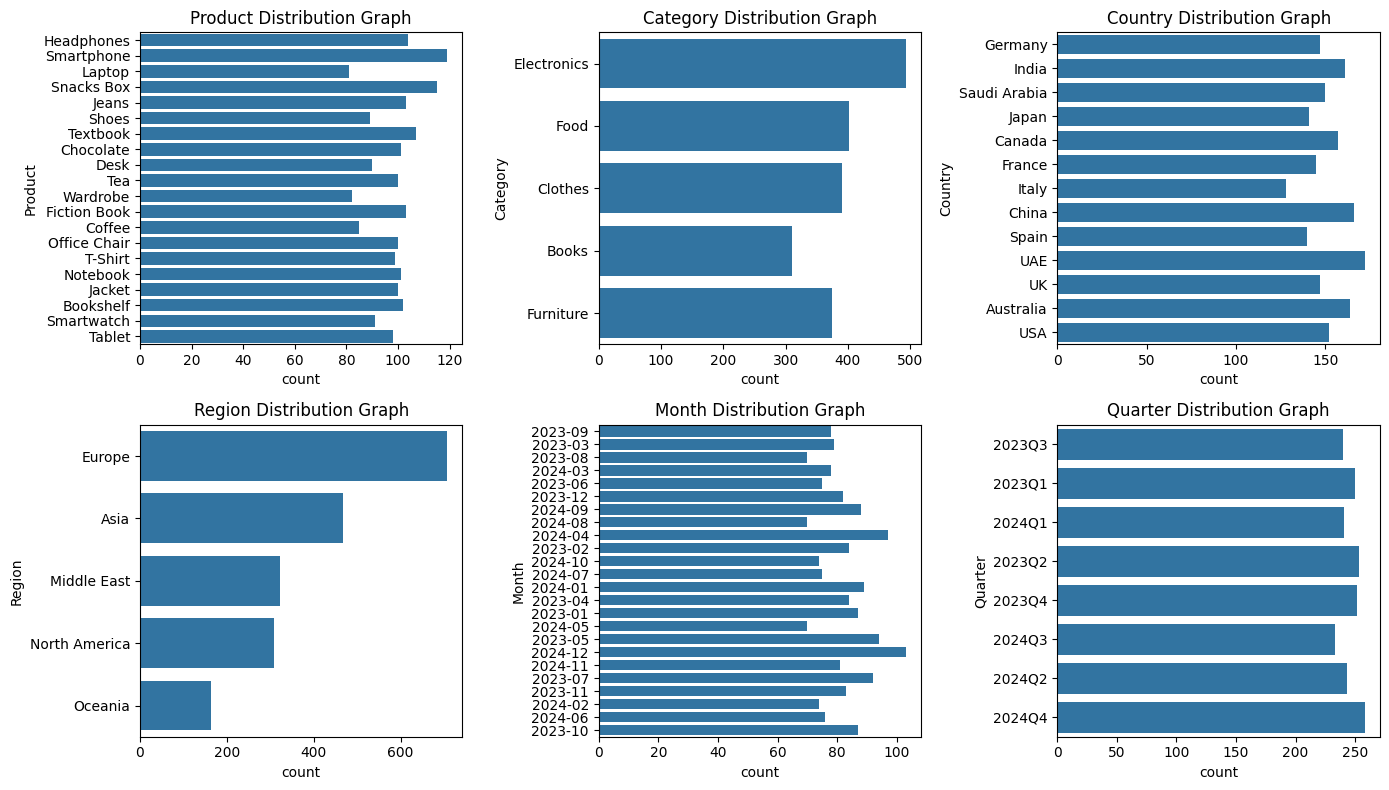

In [79]:
cat_cols = df.select_dtypes(include=["category", "object"]).columns
cat_cols = cat_cols.drop("Order ID", errors="ignore")  # Remove if exists
rows = math.ceil(len(cat_cols) / 3)
plt.figure(figsize=(14, 4 * rows))
for i, col in enumerate(cat_cols):
    plt.subplot(rows, 3, i + 1)
    sns.countplot(y=col, data=df)
    plt.title(f"{col} Distribution Graph")
plt.subplots_adjust(hspace=0.6, wspace=0.4)
plt.tight_layout()
plt.show()


#### B. Outlier Detection Graphs

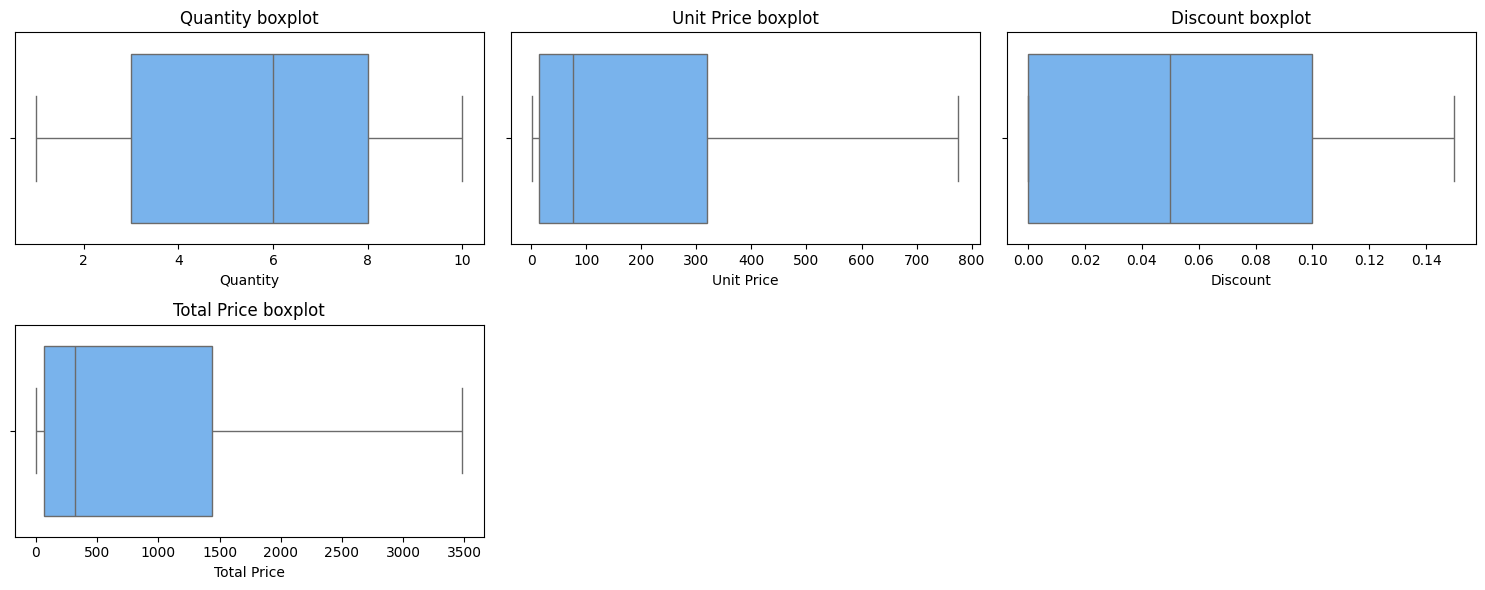

In [80]:
num_cols = df.select_dtypes("number").columns
cols_per_row = 3
n_rows = math.ceil(len(num_cols) / cols_per_row)
plt.figure(figsize=(cols_per_row * 5, n_rows * 3))
for i, col in enumerate(num_cols):
    plt.subplot(n_rows, cols_per_row, i+1)
    sns.boxplot(x=df[col], orient="h", color="#66b3ff")
    plt.title(f"{col} boxplot")
plt.tight_layout()
plt.show()

#### Numerical/Numerical Relationship

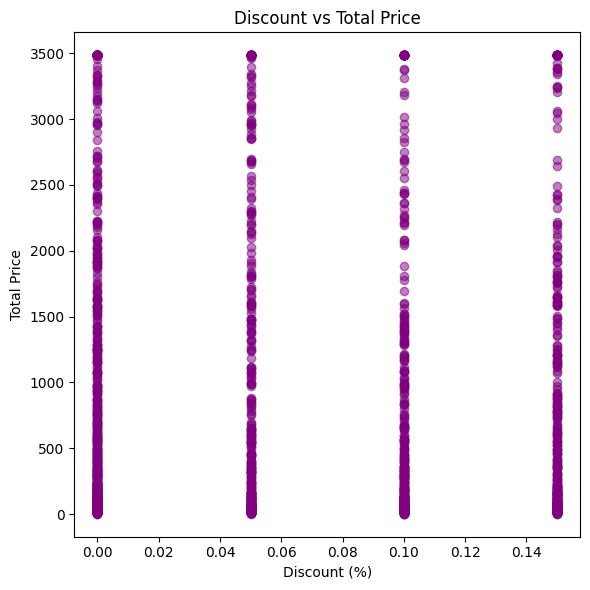

In [62]:
plt.figure(figsize=(6, 6))
plt.scatter(df["Discount"], df["Total Price"], alpha=0.5, color="purple")
plt.xlabel("Discount (%)")
plt.ylabel("Total Price")
plt.title("Discount vs Total Price")
plt.tight_layout()
plt.show()


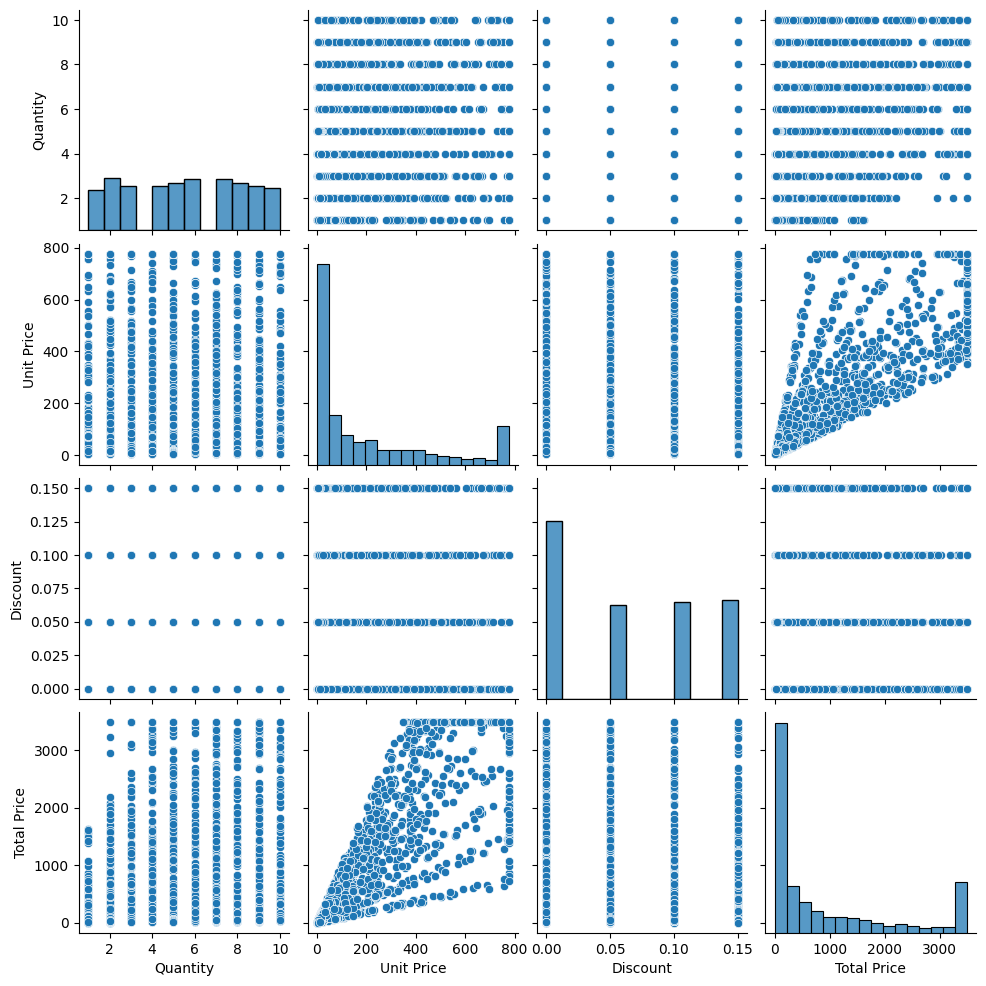

In [63]:
# Pair Plot
sns.pairplot(df)

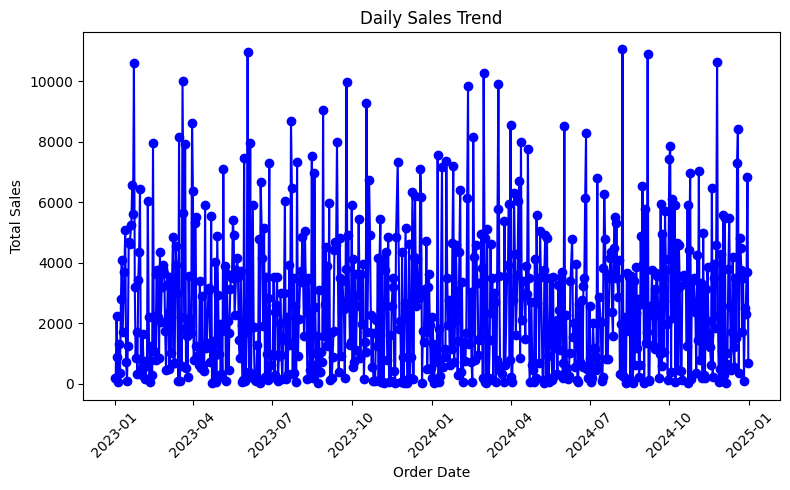

In [64]:
df["Order Date"] = pd.to_datetime(df["Order Date"])
daily_sales = df.groupby("Order Date")["Total Price"].sum().reset_index()
plt.figure(figsize=(8, 5))
plt.plot(daily_sales["Order Date"], daily_sales["Total Price"], color="blue", marker="o")
plt.xlabel("Order Date")
plt.ylabel("Total Sales")
plt.title("Daily Sales Trend")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### 11 - Data Splitting

In [65]:
X=df.drop(columns=['Total Price'])
y=df['Total Price']

#### 12 - Normalization

In [66]:
from sklearn.preprocessing import MinMaxScaler
num_cols = X.select_dtypes("number").columns
scaler = MinMaxScaler()
scaler.fit(X[num_cols])
X[num_cols] = scaler.transform(X[num_cols])

#### 13 - Encoding

In [67]:
str_cols = ["Product", "Category", "Region", "Country"]
pd.DataFrame(df[str_cols].nunique()).T

Product  Category  Region  Country
0       20         5       5       13

In [68]:
!pip install category_encoders

In [69]:
from category_encoders import OneHotEncoder
encoder = OneHotEncoder(cols = str_cols, drop_invariant=True)
X = encoder.fit_transform(X)

In [70]:
!pip install ydata_profiling

In [71]:
from ydata_profiling import ProfileReport
profile = ProfileReport(df, title="Ecommerce_Sales_2023_2024 Profiling Report")
profile.to_file("report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 12/12 [00:00<00:00, 45.02it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

##Conclusion & Recommendations

This project delivered a complete exploratory analysis of the E-Commerce Sales Data for 2023–2024, covering products, categories, regions, time periods, and promotional effects.

1.Product and Category Insights
We identified the highest-revenue products and categories, as well as those underperforming. This highlighted opportunities to focus on best-sellers and reconsider products with consistently low demand.

2.Geographic Performance
Our geographic breakdown showed which countries and regions contribute most to sales and which markets have untapped potential. Certain regions demonstrated higher responsiveness to discounts and seasonal promotions.

3.Time-Based Trends
By tracking sales across months, quarters, and years, we found clear seasonal peaks and off-seasons. This provides a roadmap for optimizing marketing campaigns and stock replenishment according to demand cycles.

4.Discount and Promotion Impact
Our analysis showed that moderate discounts tend to balance profitability and sales volume, while excessive discounts boost volume but reduce order value. Promotions work better in some regions and product categories than others.

5.Visual Analytics
We used a range of visualizations — including line charts, bar charts, and scatter plots — to reveal relationships and trends clearly, enabling more informed and confident decision-making.

####**Recommendations**

1-Prioritize High-Performing Products
Increase marketing investment and stock availability for best-selling products to maximize revenue.

2-Reevaluate Low-Performing Items
Consider discontinuing or repositioning products that show persistently low sales.

3-Target High-Potential Markets
Focus sales efforts and localized promotions on underpenetrated countries with growing sales trends.

4-Optimize Promotional Strategy
Use moderate discounts (rather than deep cuts) to maintain profitability while boosting sales.

5-Leverage Seasonal Peaks
Schedule major campaigns and inventory buildup during peak months to capitalize on high demand.

6-Test Region-Specific Campaigns
Adapt discount levels and marketing approaches based on regional responsiveness.

